### Import / Load Data Modelling Libraries
Use scikit-learn library to develop machine learning algorithms. For data visualization, use matplotlib and seaborn library

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.tight_layout()
plt.style.use('fivethirtyeight')

import datetime
#Common Model Algorithms
from catboost import Pool,CatBoostRegressor
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.metrics import mean_squared_error,roc_auc_score,recall_score, accuracy_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.stats import pearsonr
%matplotlib inline
sns.set_style('white')
pd.set_option('display.float_format', lambda x: '%.6f' % x)
#from xgboost import XGBRegressor
#from xgboost import plot_importance
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,KFold,GridSearchCV,ShuffleSplit
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.max_columns', None)

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, classification_report
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                     'Server=DCABOSERVER;'
                     'Database=ToniTest;'
                     'Trusted_Connection=yes;')
cursor=conn.cursor()
#Common model helpers
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.pipeline import Pipeline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.feature_selection import RFE



### Data Overview
Get a quick and dirty overview of variable datatypes

In [2]:
#Read from SQL Server, import data
# data = pd.read_sql_query("""SELECT * FROM DTV300_MachineLearning""",conn)
# data.info() 

In [3]:
data = pd.read_csv('Y:\GlobalShared\Data Science\MachineLearning\DTV300_MachineLearning_withRPCPTPwithin75days.csv')

In [4]:
#Data is based on all the DTV300 accounts from 76 to 180 days
cols=data.columns
print(f'Included {len(cols)} features in our analysis:\n')
print(cols)

Included 54 features in our analysis:

Index(['FileNumber', 'Zipcode', 'ZipScore', 'DateLastPaidToClientDays',
       'DateLastPaid', 'DateLastPaidScore', 'TenureDays', 'Tenure',
       'TenureScore', 'Balance', 'BalanceRange', 'BalanceScore',
       'DelinquencyDays', 'Delinquency', 'DelinquencyScore', 'DisconnectType',
       'DisconnectTypeScore', 'IRCScore', 'IRCScoreAZ', 'CancelCode',
       'CancelCodeScore', 'CVSScore', 'CVSScoreAZ', 'Disconnect2ChargeoffDays',
       'Disconnect2Chargeoff', 'Disconnect2ChargeoffScore', 'InvolRiskScore',
       'InvolRiskScoreAZ', 'Account_Type', 'Account_TypeScore', 'BalanceDiff',
       'BalanceDiffRange', 'BalanceDiffRangeScore', 'BeforeLastActivationDays',
       'BeforeLastActivation', 'BeforeLastActivationScore', 'CBSA',
       'CBSAScore', 'Chargeoff2NowDays', 'Chargeoff2Now', 'Chargeoff2NowScore',
       'NonPayCode', 'NonPayCodeScore', 'PriorCollectionDays',
       'PriorCollection', 'PriorCollectionScore', 'ServiceZipDiff',
       'Ser

In [10]:
data.shape 
#45322 rows(accounts) 54 columns(features)

(45322, 54)

In [165]:
data.head(20)
#For each attribute we have the actual data, the bucket and the score for that attribute.
#To avoid using duplicate information in our analysis, we need to choose one form. With my analysis I found that the score gives 
#the best result

FileNumber Zipcode  ZipScore  DateLastPaidToClientDays  \
0     36478656   77584         7                695.000000   
1     36930431   78223       -15                       nan   
2     36930926   45102        35                331.000000   
3     36455209   85053        17                375.000000   
4     36456145   53523       -20                338.000000   
5     36455410   17325        29                357.000000   
6     36461827   87124        -2                       nan   
7     36717393   35761        46               1252.000000   
8     36931361   87745       120                354.000000   
9     36930382   98360        -1                326.000000   
10    37513939   85307        -9                348.000000   
11    37154913   45223       -20                588.000000   
12    36932200   98823        18                320.000000   
13    36696417   35211       -14                       nan   
14    37038122   53086        19                345.000000   
15    37887283   77028       -14                391.000000   
16    37794906   35023        -2                308.000000   
17    36695919   78239       -13                837.000000   
18    36694645   28330       126                337.000000   
19    36696285   77354       -18                       nan   

                        DateLastPaid  DateLastPaidScore  TenureDays  \
0        4 - Between 1.5 and 2 years                 -3         849   
1                     0 - Never Paid                 -6         873   
2      2 - Between half and one year                  2         457   
3   3 - Between a year and 1.5 years                 -5        3075   
4      2 - Between half and one year                  2        4445   
5      2 - Between half and one year                  2        2152   
6                     0 - Never Paid                 -6        1148   
7          6 - Between 3 and 4 years                  2        1363   
8      2 - Between half and one year                  2        1351   
9      2 - Between half and one year                  2        1156   
10     2 - Between half and one year                  2        2236   
11       4 - Between 1.5 and 2 years                 -3         518   
12     2 - Between half and one year                  2         365   
13                    0 - Never Paid                 -6        1278   
14     2 - Between half and one year                  2        2006   
15  3 - Between a year and 1.5 years                 -5         832   
16     2 - Between half and one year                  2        4232   
17         5 - Between 2 and 3 years                  0         548   
18     2 - Between half and one year                  2        1921   
19                    0 - Never Paid                 -6         951   

                         Tenure  TenureScore    Balance     BalanceRange  \
0       6-Between 2 and 3 years            2  74.770000  $99.99 and less   
1       6-Between 2 and 3 years            2 301.680000   $300 - $399.99   
2       5-Between 1 and 2 years           -4 169.620000   $100 - $199.99   
3      9-Between 7 and 10 years           13 276.350000   $200 - $299.99   
4              10-over 10 years           13 181.370000   $100 - $199.99   
5       8-Between 5 and 7 years           11 142.030000   $100 - $199.99   
6       7-Between 3 and 5 years            6 145.970000   $100 - $199.99   
7       7-Between 3 and 5 years            6 123.200000   $100 - $199.99   
8       7-Between 3 and 5 years            6 379.660000   $300 - $399.99   
9       7-Between 3 and 5 years            6 104.250000   $100 - $199.99   
10      8-Between 5 and 7 years           11 208.210000   $200 - $299.99   
11      5-Between 1 and 2 years           -4 463.320000   $400 - $499.99   
12  4-Between half and one year          -10 240.000000   $200 - $299.99   
13      7-Between 3 and 5 years            6 205.000000   $200 - $299.99   
14      8-Between 5 and 7 years           11 214.060000   $200 - $299

### Analyze by visualizing data
We can confirming some of our assumptions using visualizations for analyzing the data.

Probability distributions indicate the likelihood of an event or outcome. Statisticians use the following notation to describe probabilities:

p(x) = the likelihood that random variable takes a specific value of x.

Below, I created a probability distribution plot of accounts with PTP and no PTP for different features.

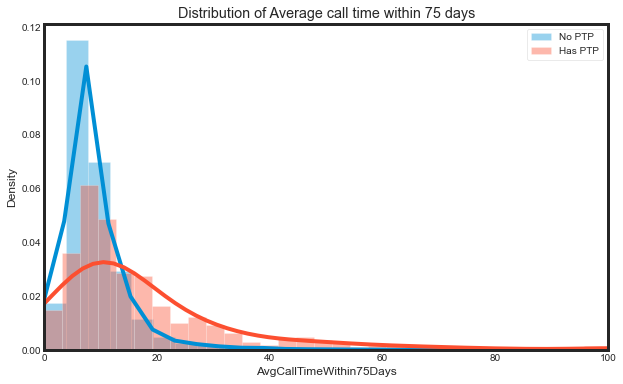

In [60]:
NoPTP = data.loc[data['IsPTP'] == 0]
HasPTP = data.loc[data['IsPTP'] == 1]
fig, ax = plt.subplots(figsize=(9,6))
s= sns.distplot(NoPTP['AvgCallTimeWithin75Days'],label = 'No PTP',bins=200, ax=ax)
s= sns.distplot(HasPTP['AvgCallTimeWithin75Days'],label = 'Has PTP',bins=100,ax=ax)
s.set(xlim=(0, 100))
s.set_title('Distribution of Average call time within 75 days')
plt.legend()
#The histogram gives us a good overview of the data. At a glance, we can see that these data clearly are not normally 
#distributed. For accounts with PTP, the peak is greater and the distribution extends further into the higher values than to the lower values.
#The accounts with PTP have a higher average call time within 75 days

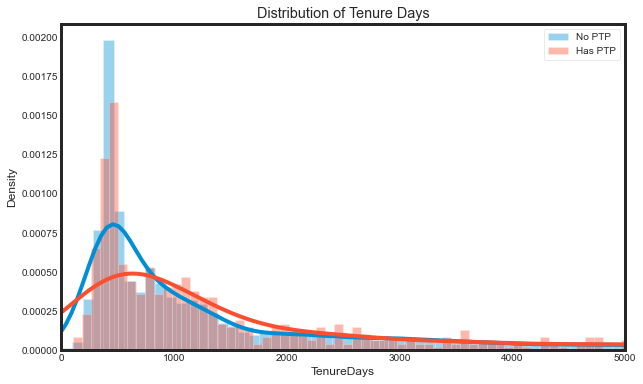

In [62]:
fig, ax = plt.subplots(figsize=(9,6))
s= sns.distplot(NoPTP['TenureDays'],label='No PTP',bins=100,ax=ax)
s= sns.distplot(HasPTP['TenureDays'],label = 'Has PTP',bins=100,ax=ax)
s.set(xlim=(0, 5000))
s.set_title('Distribution of Tenure Days')
plt.legend()

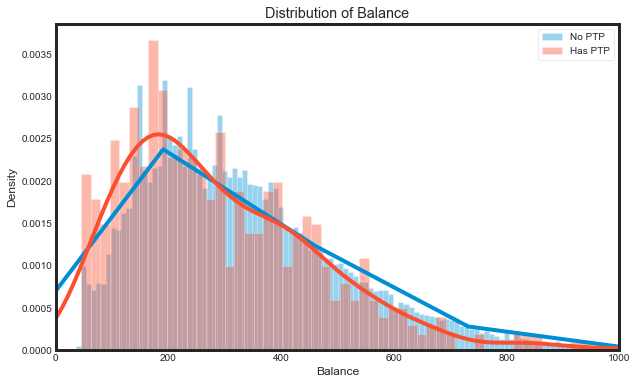

In [64]:
fig, ax = plt.subplots(figsize=(9,6))
s= sns.distplot(NoPTP['Balance'],label = 'No PTP',bins=6000,ax=ax)
s = sns.distplot(HasPTP['Balance'],label = 'Has PTP',bins=100,ax=ax)
s.set(xlim=(0, 1000))
s.set_title('Distribution of Balance')
plt.legend()
#Accounts with PTP tend to have smaller balance

Text(0.5, 1.0, 'PTP by Disconnect Type')

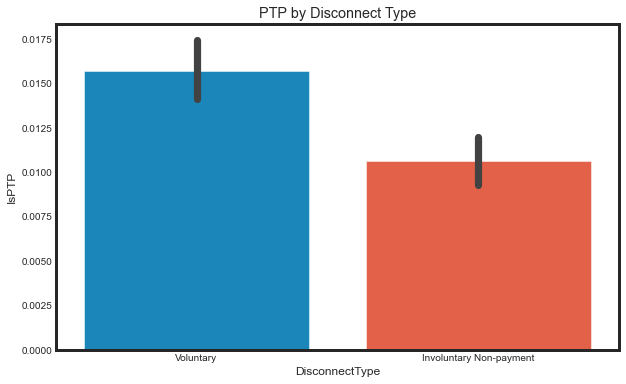

In [75]:
fig, ax = plt.subplots(figsize=(9,6))
s=sns.barplot(x='DisconnectType',y='IsPTP',data=data,ax=ax)
s.set_title('PTP by Disconnect Type')
#Acounts with voluntary disconnect type have a higher tendency to pay

In [11]:
df=data.drop(['FileNumber','Zipcode','DateLastPaidToClientDays','DateLastPaid','Tenure','TenureDays','BalanceRange','Balance','Delinquency','DelinquencyDays','DisconnectType','IRCScore','CancelCode','CVSScore','Disconnect2Chargeoff','Disconnect2ChargeoffDays','InvolRiskScore','Account_Type','BalanceDiff','BalanceDiffRange','BeforeLastActivation','BeforeLastActivationDays','CBSA','Chargeoff2Now','Chargeoff2NowDays','NonPayCode','PriorCollectionDays','PriorCollection','ServiceZipDiff'],axis=1)

#Added two new features, 
# 1.combination of balance and disconnectType
# 2.combinaton of disconnect to charge off days and disconnect type
df['Balance*DisconnectType'] = data['Balance']*df['DisconnectTypeScore']
df['Disconnect2Chargeoff*DisconnectType'] = df['Disconnect2ChargeoffScore']*df['DisconnectTypeScore']

IsPTP
0  44730
1    592

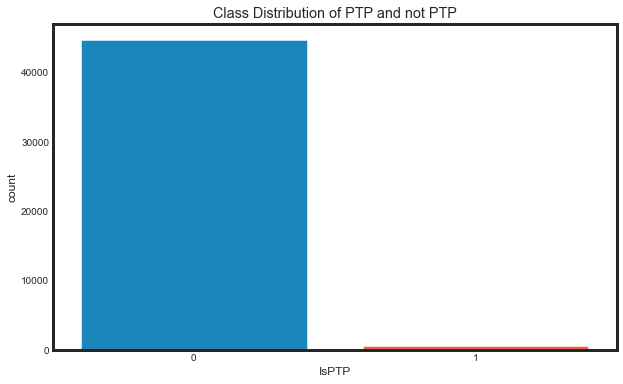

In [124]:
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(df['IsPTP'])
plt.title('Class Distribution of PTP and not PTP')

pd.DataFrame(df['IsPTP'].value_counts())
#Among 45322 accounts, 592 of them have PTP within 76-180 days

In [147]:
#correlation heatmap of original dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(16, 14))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    corr=df.corr()
    _ = sns.heatmap(
        df.corr(), 
        mask = np.triu(np.ones_like(corr, dtype=bool)),
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10},
        fmt=".1%"
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=14)



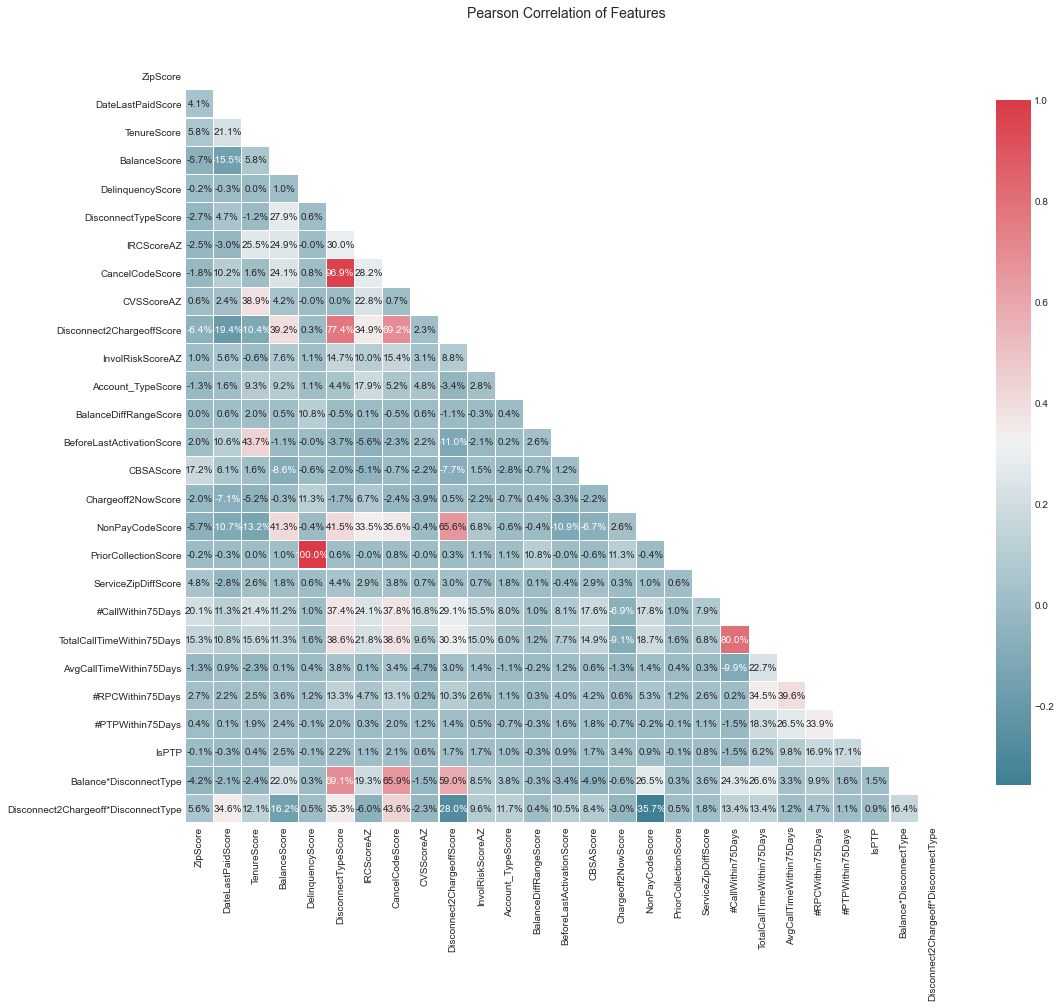

In [148]:
correlation_heatmap(df)

In [167]:
df.corr()['IsPTP'].sort_values(ascending=False,key=abs)
#The correlation coefficient is a statistical measure of the strength of the relationship between the relative 
#movements of two variables.

IsPTP                                  1.000000
#PTPWithin75Days                       0.171354
#RPCWithin75Days                       0.168629
AvgCallTimeWithin75Days                0.098100
TotalCallTimeWithin75Days              0.061510
Chargeoff2NowScore                     0.034090
BalanceScore                           0.024574
DisconnectTypeScore                    0.022409
CancelCodeScore                        0.021426
CBSAScore                              0.017491
Disconnect2ChargeoffScore              0.017431
InvolRiskScoreAZ                       0.017029
#CallWithin75Days                     -0.014955
Balance*DisconnectType                 0.014520
IRCScoreAZ                             0.011239
Account_TypeScore                      0.009584
BeforeLastActivationScore              0.009399
Disconnect2Chargeoff*DisconnectType    0.008870
NonPayCodeScore                        0.008614
ServiceZipDiffScore                    0.007698
CVSScoreAZ                             0

In [16]:
#Splitting the dataset
x=df.drop(['IsPTP'],axis=1)
y=df['IsPTP']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,stratify=df["IsPTP"])
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset

In [17]:
# #pair plots of entire dataset
# pp = sns.pairplot(df, hue = 'IsPTP', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
# pp.set(xticklabels=[])

### Model, predict and solve
Now we are ready to train a model and predict the required solution. 

In [18]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10

    recall = []
    roc_auc=[]
    f1_score=[]
    precision_score=[]
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
        recall.append(cv_recall)
        cv_roc_auc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
        roc_auc.append(cv_roc_auc)
        cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
        f1_score.append(cv_f1)
        cv_precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
        precision_score.append(cv_precision)
        names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)
        print(f'{name}: recall score: {cv_recall.mean()}, roc_auc score: {cv_roc_auc.mean()}, f1 score: {cv_f1.mean()},precision score: {cv_precision.mean()}')
        
    return names, recall, roc_auc,f1_score, precision_score

In [19]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [20]:
def ScoreDataFrame(names,recall,roc_auc,f1,precision):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    recalls = []
    roc_aucs = []
    f1s=[]
    precisions=[]
    for r in recall:
        recalls.append(floatingDecimals(r.mean(),4))
    for r in roc_auc:
        roc_aucs.append(floatingDecimals(r.mean(),4))
    for r in f1:
        f1s.append(floatingDecimals(r.mean(),4))
    for r in precision:
        precisions.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Recall Score': recalls, 'Roc_Auc Score':roc_aucs, 'F1 Score':f1s, 'Precision Score':precisions})
    return scoreDataFrame

In [21]:
#I tried 20 different machine learning algorithms that listed below, and selected 10 of them to do a deeper analysis 
#based on the efficiency and accuracy of the result.

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    ]

#### Oversampling:
Only 1.3% of the accounts within 76-180 days that do have PTP. A problem with imbalanced classification is that there are too few accounts of the PTP for the model to effectively learn the decision boundary, and in turn have poor performance on the minority class, in our cases are the accounts with PTP. 

The approach I chose to addressing imbalanced dataset is to oversample the PTP dataset.This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.


SMOTE: SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.


#### MinMax Scaler
MinMaxScaler scales all the data features in the range [0, 1] In our dataset, different attributes are measured on different scales. Differences in the scales across input variables may increase the difficulty of the problem being modeled. It can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error. 

In [22]:
from imblearn.pipeline import make_pipeline
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    smote= SMOTE(random_state=0)

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('SMOTE',smote),('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('SMOTE',smote),('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('SMOTE',smote),('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('NB'  , GaussianNB())])))
    #pipelines.append((nameOfScaler+'SVM' , Pipeline([('SMOTE',smote),('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('SMOTE',smote),('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('SMOTE',smote),('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [23]:
#score comparison after feature scaling
#standard scalar
models = GetScaledModel('minmax')
names,recall, roc_auc,f1, precision = BasedLine2(x, y, models)

minmaxLR: recall score: 0.6420056497175141, roc_auc score: 0.7580041580304172, f1 score: 0.06243912240330586,precision score: 0.032817546122144436
minmaxLDA: recall score: 0.6267514124293785, roc_auc score: 0.7478546293454386, f1 score: 0.05981159962231575,precision score: 0.03140545775431453
minmaxKNN: recall score: 0.1586723163841808, roc_auc score: 0.5614478774719882, f1 score: 0.05809205618965056,precision score: 0.035577082017329474
minmaxCART: recall score: 0.07762711864406781, roc_auc score: 0.5237321101751754, f1 score: 0.043022242479540694,precision score: 0.03484107674062106
minmaxNB: recall score: 0.9915254237288135, roc_auc score: 0.7176075947208675, f1 score: 0.026088571550694356,precision score: 0.013218189195834529
minmaxAB: recall score: 0.18423728813559323, roc_auc score: 0.6586068135113253, f1 score: 0.07030732023723987,precision score: 0.04347450126803372
minmaxGBM: recall score: 0.11511299435028248, roc_auc score: 0.6742908360394634, f1 score: 0.07950629530475975,pr

In [24]:
PlotBoxR().PlotResult(names,recall)
PlotBoxR().PlotResult(names,roc_auc)
PlotBoxR().PlotResult(names,f1)
PlotBoxR().PlotResult(names,precision)
# compareModels = pd.concat([basedLineScore,
#                            scaledScoreStandard], axis=1)
# compareModels

- Precision:Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.Precision is a good measure to determine, when the costs of False Positive is high. 

- Recall:Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

- F1:a weighted average of the precision and recall,seek a balance between Precision and Recall

In [25]:
ScaledScore = ScoreDataFrame(names,recall, roc_auc,f1,precision)
ScaledScore
#If the dataset is heavily imbalanced and/or you mostly care about the positive class, I’d consider using F1 score
#By comparing the performance metrics of all the models. I decided to build the prediction model with logistic regression algorithm

Model  Recall Score  Roc_Auc Score  F1 Score  Precision Score
0    minmaxLR      0.642000       0.758000  0.062400         0.032800
1   minmaxLDA      0.626800       0.747900  0.059800         0.031400
2   minmaxKNN      0.158700       0.561400  0.058100         0.035600
3  minmaxCART      0.077600       0.523700  0.043000         0.034800
4    minmaxNB      0.991500       0.717600  0.026100         0.013200
5    minmaxAB      0.184200       0.658600  0.070300         0.043500
6   minmaxGBM      0.115100       0.674300  0.079500         0.061200
7    minmaxRF      0.022000       0.705300  0.036700         0.091400
8    minmaxET      0.015200       0.700500  0.029900         0.178200

In [26]:
steps = [('SMOTE', SMOTE(random_state = 0)),('minmax', MinMaxScaler()), ('LR', LogisticRegression())]
pipeline = Pipeline(steps) # define the pipeline object.

In [27]:
#In the above we run with the default parameters determined by the LogisticRegression. here we tuned the hyper parameters
#and identify which ones are best to use
param_grid = {
    'LR__class_weight' : ['balanced'],
    'LR__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'LR__penalty' : ['l1', 'l2', 'elasticnet']
}
search = GridSearchCV(pipeline, param_grid, n_jobs=-1)
search.fit(x_train,y_train)
print("Best parameter (CV score =%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score =0.758):
{'LR__class_weight': 'balanced', 'LR__penalty': 'l2', 'LR__solver': 'newton-cg'}


In [28]:
sm = SMOTE(random_state=0)
x_train_over, y_train_over = sm.fit_sample(x_train, y_train.ravel()) 

In [29]:
#Feature Scaling, fit the training set
mc = MinMaxScaler().fit(x_train_over)
#Transform the training set and test set
x_train_over_scaled = pd.DataFrame(mc.transform(x_train_over),columns=x_train.columns)
y_train_over = pd.DataFrame({'IsPTP': y_train_over})
x_test_scaled = pd.DataFrame(mc.transform(x_test),columns=x_test.columns)
df_over_scaled=pd.concat([x_train_over_scaled,y_train_over],axis=1)

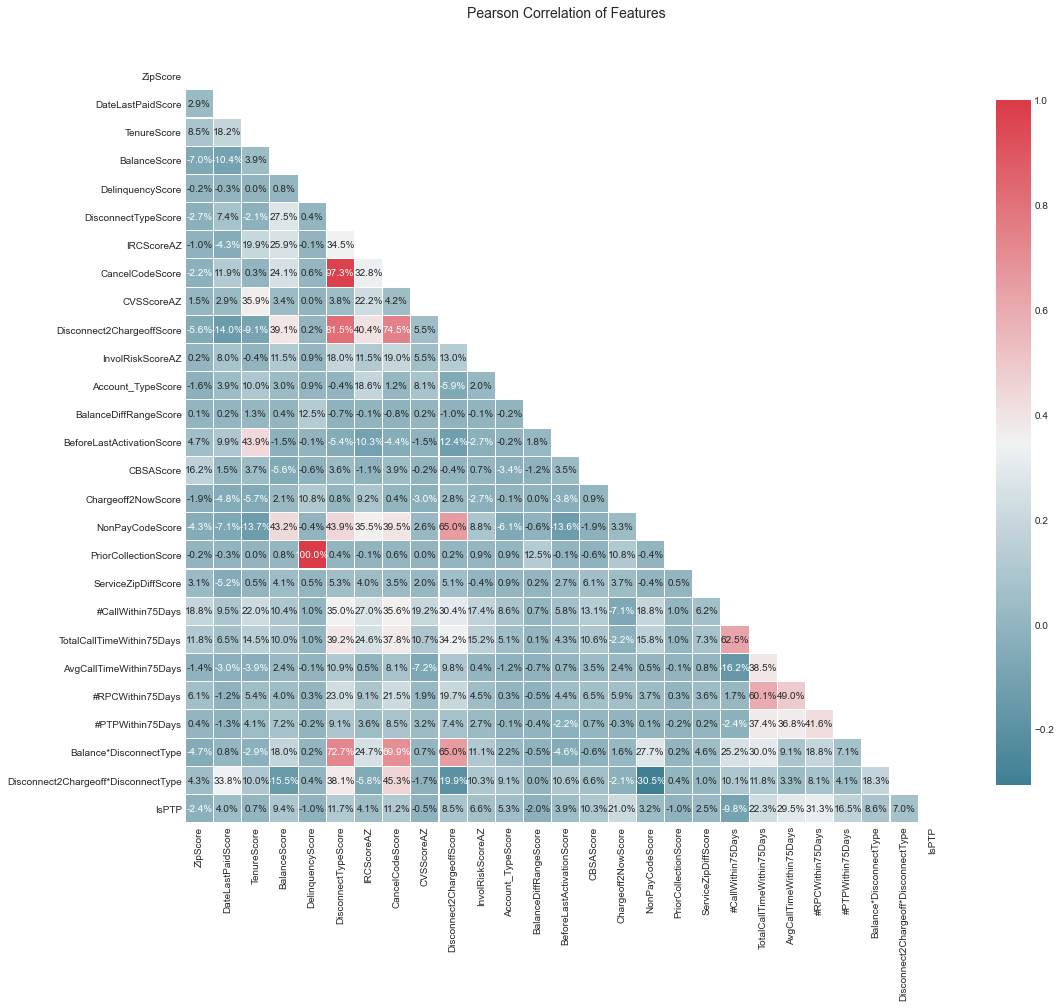

In [166]:
correlation_heatmap(df_over_scaled)

In [31]:
#Selected the set of optimal hyperparameters for logistic regression algorithm
log_reg=LogisticRegression(penalty='l2',solver='liblinear',class_weight = 'balanced')

In [32]:
#Feature Scaling, fit the training set
mc = MinMaxScaler().fit(x_train)
#Transform the training set and test set
x_train_scaled = pd.DataFrame(mc.transform(x_train),columns=x_train.columns)
# y_train = pd.DataFrame({'IsPTP': y_train})
x_test_scaled = pd.DataFrame(mc.transform(x_test),columns=x_test.columns)
df_scaled=pd.concat([x_train_scaled,y_train],axis=1)

In [170]:
#Applied oversampling and MinMaxScaler on training data, fit with logistic regression with best tuning parameters
#In case of 2 classes, the prob threshold is 0.5: if P(Y=0) > 0.5 then obviously P(Y=0) > P(Y=1).

# log_reg.fit(x_train_over_scaled,y_train_over)
# y_predict_over_scaled = log_reg.predict(x_test_scaled)
# attributes = x_train.columns
# coef = pd.DataFrame({'Column':attributes,'Coefficient on oversampled and scaled data':log_reg.coef_[0]})
# log_reg.fit(x_train_scaled,y_train)
# y_predict_scaled = log_reg.predict(x_test_scaled)
# coef['Coefficient on scaled data'] = log_reg.coef_[0]
# coef.sort_values(by='Coefficient on oversampled and scaled data',key= abs, ascending = False)

In [34]:
#Confusion matrix on oversampled and scaled data
cf_matrix_over_scaled = confusion_matrix(y_test, y_predict_over_scaled)

In [91]:
colormap = sns.diverging_palette(221, 10, as_cmap = True)

In [95]:
def cf_matrix_plot(cf_matrix,i,title):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    axs[i]=sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=colormap,ax=axs[i],annot_kws={"size": 20})
    classes = ['No PTP','Has PTP']
    tick_marks = np.arange(len(classes))
    axs[i].set_title('Confusion Matrix with '+ title)
    axs[i].set_xticks(tick_marks, classes)
    axs[i].set_yticks(tick_marks, classes)

In [36]:
#Confusion matrix without oversampling
log_reg.fit(x_train_scaled,y_train)
y_predict = log_reg.predict(x_test_scaled)
cf_matrix_scaled = confusion_matrix(y_test, y_predict)

In [37]:
#Without oversampling
print(search.classes_)

y_test_prob = log_reg.predict_proba(x_test_scaled)[:,-1]
#The first column is the probability that the entry has the 0 label 
#and the second column is the probability that the entry has the +1 label. 
#Note that classes are ordered as they are in self.classes_ -> array([0, 1], dtype=int64)

[0 1]


In [38]:
# pred=pd.DataFrame({'y test': y_test,'y test predict prob': y_test_prob})
# pred.loc[pred['y test']==1].head(60)

#### Confusion Matrix:

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

- The target variable has two values: Positive or Negative
- The columns represent the actual values of the target variable
- The rows represent the predicted values of the target variable

Basic Terms:
- true positives (TP): These are cases in which we predicted yes (they have PTP), and they do have the PTP.
- true negatives (TN): We predicted no, and they don't have PTP.
- false positives (FP): We predicted yes, but they don't actually have PTP.
- false negatives (FN): We predicted no, but they actually do have PTP.

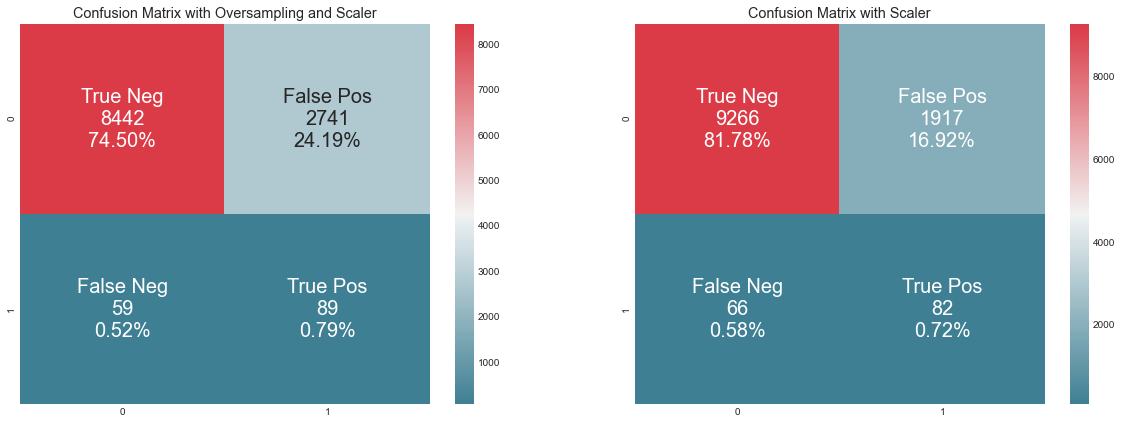

In [96]:
# Logistic Regression is using a threshold of P = 0.5  for binary classification
fig,axs = plt.subplots(1,2,figsize=(18,7))
cf_matrix_plot(cf_matrix_over_scaled,0,'Oversampling and Scaler')
cf_matrix_plot(cf_matrix_scaled,1,'Scaler')

In [40]:
# Feature extraction
model = log_reg
rfe = RFE(model, 1)
fit = rfe.fit(x_train_over_scaled,y_train_over)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))


In [41]:
print(f'Rank the features (columns) in a oversampled and scaled training dataset that are more or most relevant in predicting PTP.\n')
feature_rank_over_scaled=pd.DataFrame(x_train.columns,index=fit.ranking_,columns=['Feature'])
feature_rank_over_scaled.sort_index()

Rank the features (columns) in a oversampled and scaled training dataset that are more or most relevant in predicting PTP.



Feature
1               AvgCallTimeWithin75Days
2                    Chargeoff2NowScore
3             TotalCallTimeWithin75Days
4                     #CallWithin75Days
5                Balance*DisconnectType
6                             CBSAScore
7                  PriorCollectionScore
8                      #RPCWithin75Days
9                 BalanceDiffRangeScore
10                     DelinquencyScore
11                    Account_TypeScore
12                         BalanceScore
13                    DateLastPaidScore
14                      CancelCodeScore
15                             ZipScore
16                           CVSScoreAZ
17            BeforeLastActivationScore
18                  DisconnectTypeScore
19                           IRCScoreAZ
20                     InvolRiskScoreAZ
21                     #PTPWithin75Days
22  Disconnect2Chargeoff*DisconnectType
23            Disconnect2ChargeoffScore
24                      NonPayCodeScore
25                          TenureScore
26                  ServiceZipDiffScore

In [42]:
#With oversampling
selected_features_over = feature_rank_over_scaled.sort_index()[:20]['Feature']

In [43]:
log_reg.fit(x_train_over_scaled[selected_features_over],y_train_over)
y_predict = log_reg.predict(x_test_scaled[selected_features_over])
cf_matrix_RFE_over_scaled = confusion_matrix(y_test, y_predict)

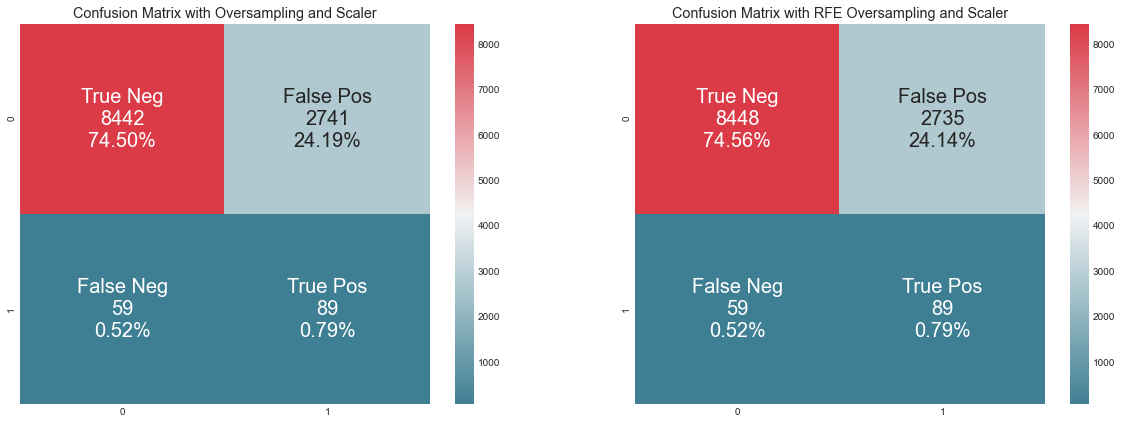

In [97]:
fig,axs = plt.subplots(1,2,figsize=(18,7))
cf_matrix_plot(cf_matrix_over_scaled,0,'Oversampling and Scaler')
cf_matrix_plot(cf_matrix_RFE_over_scaled,1,'RFE Oversampling and Scaler')

In [45]:
# model = log_reg
# rfe = RFE(model, 1)
# fit = rfe.fit(x_train_scaled,y_train)
# print(f'Rank the features (columns) in a scaled training dataset that are more or most relevant in predicting PTP.\n')
# feature_rank_scaled=pd.DataFrame(x_train.columns,index=fit.ranking_,columns=['Feature'])
# feature_rank_scaled.sort_index()

In [46]:
#Without oversampling
# selected_features = feature_rank_scaled.sort_index()[:24]['Feature']

In [47]:
# log_reg.fit(x_train_scaled[selected_features],y_train)
# y_predict = log_reg.predict(x_test_scaled[selected_features])
# cf_matrix_RFE_scaled = confusion_matrix(y_test, y_predict)
# fig,axs = plt.subplots(1,2,figsize=(18,7))
# cf_matrix_plot(cf_matrix_scaled,0,'Scaler')
# cf_matrix_plot(cf_matrix_RFE_scaled,1,'RFE and Scaler')

In [98]:
def cf_matrix_plot_threshold(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=colormap, annot_kws={"size": 20})
#     classes = ['No PTP','Has PTP']
#     tick_marks = np.arange(len(classes))
#     plt.set_xticks(tick_marks, classes)
#     plt.set_yticks(tick_marks, classes)

In [49]:
print(f'There are {x_test.shape[0]} testing accounts')
y_test.value_counts()

There are 11331 testing accounts


0    11183
1      148
Name: IsPTP, dtype: int64

The list of threshold we tested: 
0.1,  0.15,  0.2,  0.25,  0.3,  0.35,  0.4,  0.45,  0.5

******************For threshold = 0.1******************


We missed 1 PTP accounts, which is 0.68% of the total PTP acounts within 76 to 180 days

Based on the testing result, 361 accounts we dont need to call after 75 days, which is 3.19% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 1444.0 number of accounts,  we can save 49094.0 calls


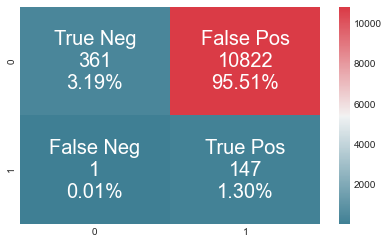


******************For threshold = 0.15******************


We missed 4 PTP accounts, which is 2.70% of the total PTP acounts within 76 to 180 days

Based on the testing result, 1132 accounts we dont need to call after 75 days, which is 9.99% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 4528.0 number of accounts,  we can save 153945.0 calls


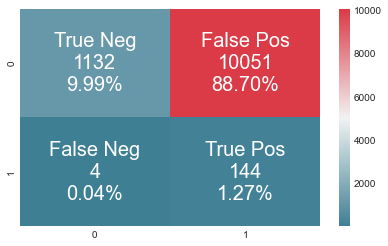


******************For threshold = 0.2******************


We missed 9 PTP accounts, which is 6.08% of the total PTP acounts within 76 to 180 days

Based on the testing result, 2207 accounts we dont need to call after 75 days, which is 19.48% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 8828.0 number of accounts,  we can save 300139.0 calls


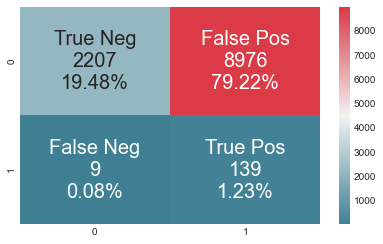


******************For threshold = 0.25******************


We missed 21 PTP accounts, which is 14.19% of the total PTP acounts within 76 to 180 days

Based on the testing result, 3301 accounts we dont need to call after 75 days, which is 29.13% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 13203.0 number of accounts,  we can save 448916.0 calls


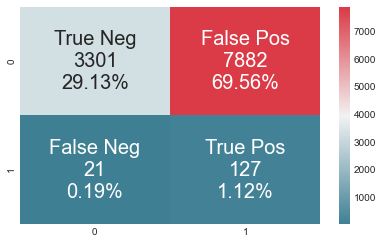


******************For threshold = 0.3******************


We missed 27 PTP accounts, which is 18.24% of the total PTP acounts within 76 to 180 days

Based on the testing result, 4345 accounts we dont need to call after 75 days, which is 38.35% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 17379.0 number of accounts,  we can save 590894.0 calls


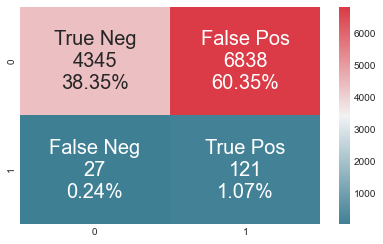


******************For threshold = 0.35******************


We missed 31 PTP accounts, which is 20.95% of the total PTP acounts within 76 to 180 days

Based on the testing result, 5476 accounts we dont need to call after 75 days, which is 48.33% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 21903.0 number of accounts,  we can save 744703.0 calls


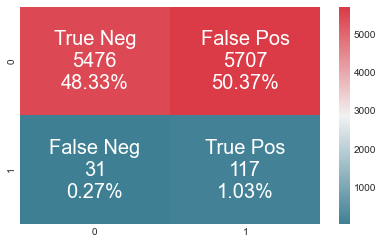


******************For threshold = 0.4******************


We missed 42 PTP accounts, which is 28.38% of the total PTP acounts within 76 to 180 days

Based on the testing result, 6550 accounts we dont need to call after 75 days, which is 57.81% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 26199.0 number of accounts,  we can save 890761.0 calls


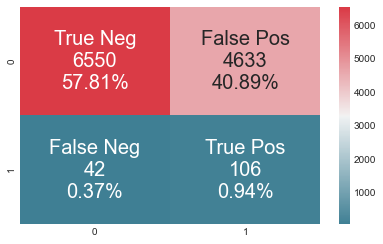


******************For threshold = 0.45******************


We missed 56 PTP accounts, which is 37.84% of the total PTP acounts within 76 to 180 days

Based on the testing result, 7548 accounts we dont need to call after 75 days, which is 66.61% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 30191.0 number of accounts,  we can save 1026483.0 calls


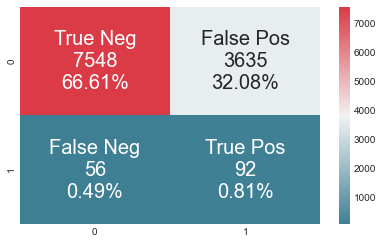


******************For threshold = 0.5******************


We missed 59 PTP accounts, which is 39.86% of the total PTP acounts within 76 to 180 days

Based on the testing result, 8448 accounts we dont need to call after 75 days, which is 74.56% of the total accounts within 76 to 180 days

Currently we have 45322 DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call 33791.0 number of accounts,  we can save 1148877.0 calls


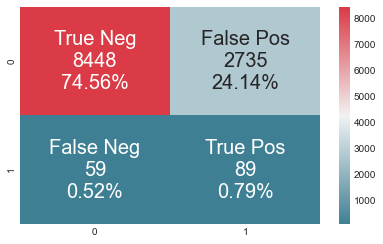

In [169]:
#Oversample and scaled with selected features
log_reg.fit(x_train_over_scaled[selected_features_over],y_train_over)
pred_proba = log_reg.predict_proba(x_test_scaled[selected_features_over])[:,-1]
threshold_list = list(np.linspace(0.1,0.5, 9))
threshold_list = [round(x,2) for x in threshold_list]

print('\033[1m' + 'The list of threshold we tested: '  + '\033[0m')
print('\033[1m' + ',  '.join(str(x) for x in threshold_list) + '\033[0m')

for i in threshold_list:
    print('\033[1m' + f'\n******************For threshold = {i}******************\n'+ '\033[0m')
    y_test_pred = list(map(lambda x: 1 if x > i else 0,pred_proba))
#     test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
#                                            y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix.size,1))
    test_accuracy = accuracy_score(y_test,y_test_pred)
    test_precision = precision_score(y_test,y_test_pred)
    test_f1 = f1_score(y_test,y_test_pred)
#    print(f'Our testing accuracy is {test_accuracy}')
#     print(f'Our testing precision is {test_precision}')
#     print(f'Our testing f1 is {test_f1}')
    
    cf_matrix=confusion_matrix(y_test,y_test_pred)
    cf_matrix_plot_threshold(cf_matrix)
    true_neg = cf_matrix[0][0]
    false_pos = cf_matrix[0][1]
    false_neg=cf_matrix[1][0]
    true_pos = cf_matrix[1][1]
    print(f'\nWe missed \033[1m{false_neg}\033[0m PTP accounts, which is '+'\033[1m'+'{:.2%}'.format(false_neg/(false_neg+true_pos))+ '\033[0m'+ ' of the total PTP acounts within 76 to 180 days')
    print(f'\nBased on the testing result, \033[1m{true_neg}\033[0m accounts we dont need to call after 75 days, which is ' + 
         '\033[1m'+'{:.2%}'.format(true_neg/y_test.shape[0])+ '\033[0m'+' of the total accounts within 76 to 180 days')
    print(f'\nCurrently we have \033[1m{data.shape[0]}\033[0m DTV300 account that are within 76 to 180 days, with the machine learning model we dont need to call \033[1m{round(true_neg/y_test.shape[0]*data.shape[0],0)}\033[0m number of accounts,  we can save \033[1m{round(true_neg/y_test.shape[0]*data.shape[0]*34,0)}\033[0m calls')
    plt.show()


In [51]:
# #Oversample and scaled with all features
# log_reg.fit(x_train_over_scaled,y_train_over)
# pred_proba = log_reg.predict_proba(x_test_scaled)[:,-1]
# threshold_list = list(np.linspace(0.1,0.5, 9))
# for i in threshold_list:
#     print(f'\n*************For threshold = {i}*************')
#     y_test_pred = list(map(lambda x: 1 if x > i else 0,pred_proba))
# #     test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
# #                                            y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix.size,1))
#     test_accuracy = accuracy_score(y_test,y_test_pred)
#     print(f'Our testing accuracy is {test_accuracy}')
    
#     print(confusion_matrix(y_test,y_test_pred))
    